<a href="https://colab.research.google.com/github/otionrec/.github-workflows/blob/master/GL_Artificial_Neural_Newtorks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using Convolutional Neural Networks

In [ ]:
# Importing training and testing datasets

!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2024-10-06 23:25:19--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/1gen23zil5ni7ffhtiur1/training_set.zip?rlkey=royd23vjl40u1r59vzobpa873 [following]
--2024-10-06 23:25:19--  https://www.dropbox.com/scl/fi/1gen23zil5ni7ffhtiur1/training_set.zip?rlkey=royd23vjl40u1r59vzobpa873
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7a49f12b2de0a9130b7d41e38a.dl.dropboxusercontent.com/cd/0/inline/Cb-hJQXCsz_KLOnDrM6Xus8yf5VLaImJ3L0ReM8HniqCVLLFAQ7fQTCW_fSn015GTWXq2i0rnhPd_MnO0HVJaU984jPD3wnl6h1bW1_4c96XIrkl_qkL81ktJOLZPfMWaXXZotz0wnkCqHgoQ7gSynww/file# [following]
--2024-10-06 23:25:20--  https://uc7a49f12b2de0a9130b7d41e38a.dl.dropboxusercontent.com/c

In [ ]:
# Unzipping the compressed dataset
!unzip training_set.zip
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

Populating the interactive namespace from numpy and matplotlib


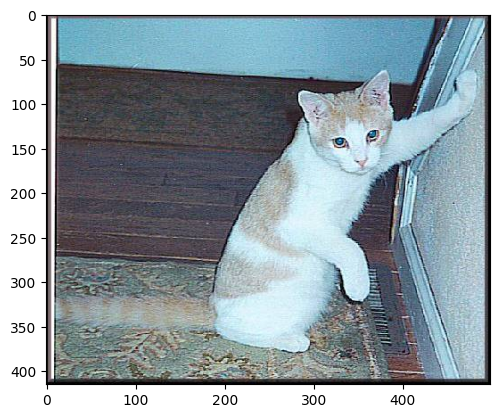

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as npimg
img=npimg.imread('test_set/test_set/cats/cat.4001.jpg')
imgplot = plt.imshow(img)
plt.show()

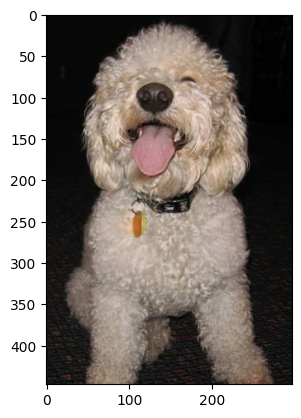

In [ ]:
img=npimg.imread('test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# Importing the required libraries
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [ ]:
# finding out what TensorFlow version that we are using
print(tensorflow.__version__)

2.17.0


# Model Design

In [ ]:
# Parameter initialization
img_width, img_height = 150, 150
train_data_dir = r"training_set/training_set"
validation_data_dir = r"test_set/test_set"
nb_train_samples = 100
nb_validation_samples = 100
epochs = 20
batch_size = 20

# Checking shapes of the images


Image data is represented in a 3D array: [rows][cols][channels] in a channel last representation. Channels are the first dimension in channel first representation

In [ ]:
import tensorflow.keras.backend as k
if k.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [ ]:
# Image generation to train the model
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)
# Bringing RGB values from 0-255 to a range of 0-1

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


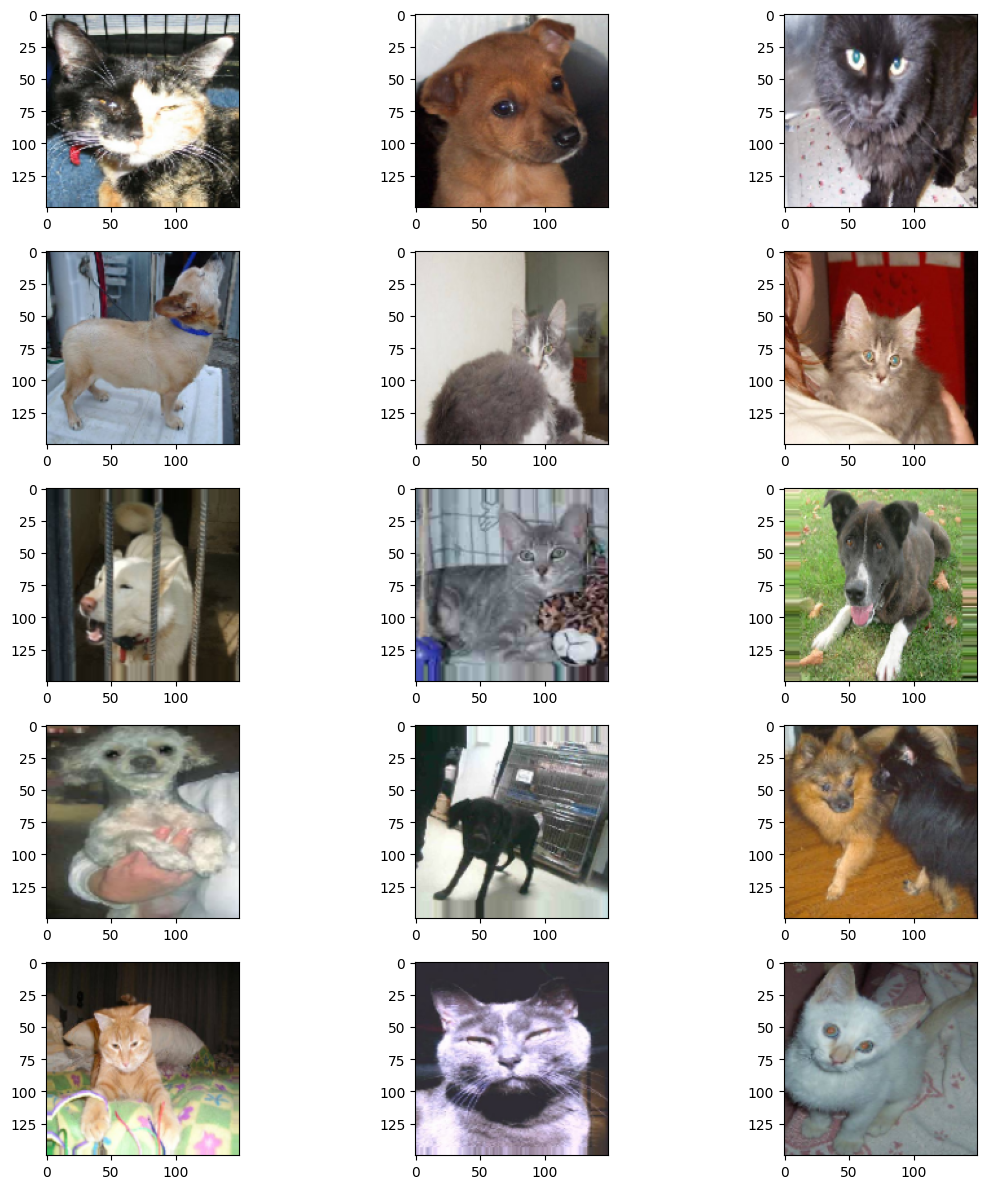

In [ ]:
# Representation of ImageDataGenerator
plt.figure(figsize=(12,12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
# Building the CNN Model
# Layers in CNN:
# 1. Convolutional Layer
# 2. ReLu
# 3. Pooling Layer
# 4. Fully Connected Layer (Dense)

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=input_shape)) # 64 neurons using 3x3 filter

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # Pooling reduces the size of the data

model.add(Flatten()) # Conversion of multi-dimensional array to 1D array
model.add(Dense(64)) # Dense layer of 64 neurons

model.add(Activation('relu'))
model.add(Dense(1)) # Output layer
model.add(Activation('sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 148, 148, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 350464)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      22,429,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,431,617 (85.57 MB)

 Trainable params: 22,431,617 (85.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from logging import logProcesses
# Model Compilation
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 148, 148, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 350464)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      22,429,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,431,617 (85.57 MB)

 Trainable params: 22,431,617 (85.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model Fitting
training = model.fit(train_generator, steps_per_epoch = nb_train_samples, epochs = epochs, validation_data = validation_generator, validation_steps = nb_validation_samples)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 208ms/step - accuracy: 0.5143 - loss: 3.8289 - val_accuracy: 0.5635 - val_loss: 0.6647
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.5916 - loss: 0.6653

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 174ms/step - accuracy: 0.5916 - loss: 0.6655 - val_accuracy: 0.6087 - val_loss: 0.6673
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 168ms/step - accuracy: 0.6386 - loss: 0.6346 - val_accuracy: 0.6605 - val_loss: 0.6174
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.6357 - loss: 0.6600 - val_accuracy: 0.7826 - val_loss: 0.6133
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7000 - loss: 0.5510 - val_accuracy: 0.6865 - val_loss: 0.5958
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 161ms/step - accuracy: 0.6625 - loss: 0.6286 - val_accuracy: 0.6522 - val_loss: 0.6226
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 154ms/step - accuracy: 0.6571 - loss: 0.6334 - val_accuracy: 0.6960 - val_loss: 0.5819
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 176ms/step - accuracy: 0.6729 - loss: 0.6066 - val_accuracy: 0.6522 - val_loss: 0.5923
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 138ms/step - accuracy: 0.6806 - loss: 0.6131 - val_a

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


<function matplotlib.pyplot.show(close=None, block=None)>

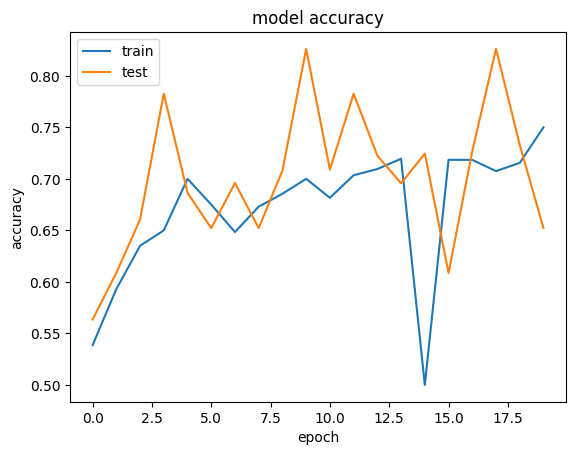

In [ ]:
from io import IncrementalNewlineDecoder
# Finding out Model Accuracy
import matplotlib.pyplot as plt
%matplotlib inline

print(training.history.keys()) # Listing all training data
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show

# test is the same as validation

<function matplotlib.pyplot.show(close=None, block=None)>

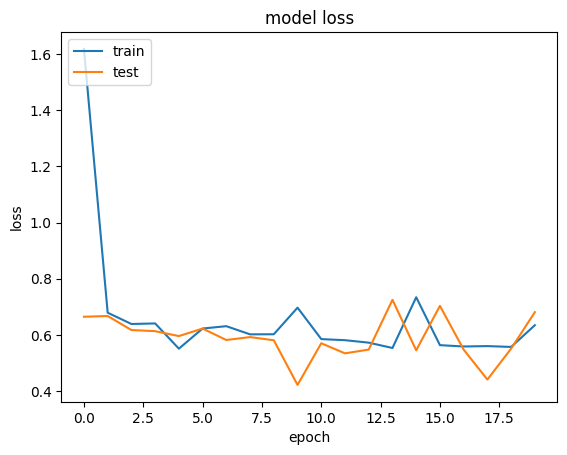

In [ ]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.]]
Prediction: cat


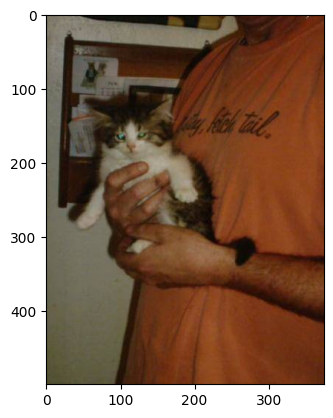

In [ ]:
# Image prediction
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img('test_set/test_set/dogs/dog.4003.jpg', target_size = (150, 150))

img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0] == 1:
  prediction = "dog"
else:
  prediction = "cat"
print('Prediction:',prediction)

img=plt.imread('test_set/test_set/cats/cat.4002.jpg')
imgplot = plt.imshow(img)
plt.show()